In [1]:

import os
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import tensorflow_addons as tfa

from sklearn.metrics import *
import scikitplot as skplt

from functools import partial
import albumentations as A
import matplotlib.pyplot as plt
import seaborn as sns

AUTOTUNE = tf.data.experimental.AUTOTUNE

data = pd.read_csv('D:/semester3/dataset/archive/Folds.csv')
img_dir = 'D:/semester3/dataset/archive/BreaKHis_v1/'
class_names = ['benign', 'malignant']

In [2]:
import glob
files = glob.glob('D:\\semester3\\dataset_project\\breast\\benign\\SOB\\adenosis\\SOB_B_A_14-22549AB\\**\\*.png',recursive = True)
for f in files:
    if '40X' in f:
        print('40')
    if '400X' in f:
        print('400X')
    if '200X' in f:
        print('200X')
    if '100X' in f:
        print('100X')

100X
100X
100X
100X
100X
100X
100X
100X
100X
100X
100X
100X
100X
100X
100X
100X
100X
100X
100X
100X
100X
100X
100X
100X
100X
100X
100X
100X
100X
100X
200X
200X
200X
200X
200X
200X
200X
200X
200X
200X
200X
200X
200X
200X
200X
200X
200X
200X
200X
200X
200X
200X
200X
200X
200X
200X
200X
200X
200X
200X
200X
200X
400X
400X
400X
400X
400X
400X
400X
400X
400X
400X
400X
400X
400X
400X
400X
400X
400X
400X
400X
400X
400X
400X
400X
400X
400X
400X
400X
400X
400X
400X
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40


In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.morphology import extrema
from skimage.morphology import watershed as skwater

def ShowImage(title,img,ctype):
  if ctype=='bgr':
    b,g,r = cv2.split(img)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)
  elif ctype=='hsv':
    rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    plt.imshow(rgb)
  elif ctype=='gray':
    plt.imshow(img,cmap='gray')
  elif ctype=='rgb':
    plt.imshow(img)
  else:
    raise Exception("Unknown colour type")
  plt.title(title)
  plt.show()

In [20]:
import glob
import os
files = glob.glob('D:\\semester3\\dataset_project\\breast\\benign\\SOB\\**\\**\\**\\*.png',recursive = True)
parent_path = 'D:\\semester3\\test\\benign\\SOB'
for f in files:
    if 'adenosis' in f:
        directory = 'adenosis'
        path = os.path.join(parent_path, directory)
        try:
            os.makedirs(path, exist_ok = True)
        except OSError as error:
            print("Directory '%s' can not be created" % directory)
        if 'SOB_B_A_14-22549AB' in f:
            path_1 = os.path.join(path, 'SOB_B_A_14-22549AB')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)                   
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
        elif 'SOB_B_A_14-22549CD' in f:
            path_1 = os.path.join(path, 'SOB_B_A_14-22549CD')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)   
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)   
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)   
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)   
        elif 'SOB_B_A_14-22549G' in f:
            path_1 = os.path.join(path, 'SOB_B_A_14-22549G')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
        elif 'SOB_B_A_14-29960CD' in f:
            path_1 = os.path.join(path, 'SOB_B_A_14-29960CD')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
    elif 'fibroadenoma' in f:
        directory = 'fibroadenoma'
        path = os.path.join(parent_path, directory)
        try:
            os.makedirs(path, exist_ok = True)
        except OSError as error:
            print("Directory '%s' can not be created" % directory)
        if 'SOB_B_F_14-9133' in f:
            path_1 = os.path.join(path, 'SOB_B_F_14-9133')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
        elif 'SOB_B_F_14-14134' in f:
            path_1 = os.path.join(path, 'SOB_B_F_14-14134')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        elif 'SOB_B_F_14-14134E' in f:
            path_1 = os.path.join(path, 'SOB_B_F_14-14134E')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        elif 'SOB_B_F_14-21998CD' in f:
            path_1 = os.path.join(path, 'SOB_B_F_14-21998CD')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        elif 'SOB_B_F_14-21998EF' in f:
            path_1 = os.path.join(path, 'SOB_B_F_14-21998EF')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        elif 'SOB_B_F_14-23060AB' in f:
            path_1 = os.path.join(path, 'SOB_B_F_14-23060AB')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        elif 'SOB_B_F_14-23060CD' in f:
            path_1 = os.path.join(path, 'SOB_B_F_14-23060CD')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        elif 'SOB_B_F_14-23222AB' in f:
            path_1 = os.path.join(path, 'SOB_B_F_14-23222AB')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        elif 'SOB_B_F_14-25197' in f:
            path_1 = os.path.join(path, 'SOB_B_F_14-25197')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        elif 'SOB_B_F_14-29960AB' in f:
            path_1 = os.path.join(path, 'SOB_B_F_14-29960AB')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
    elif 'phyllodes_tumor' in f:
        directory = 'phyllodes_tumor'
        path = os.path.join(parent_path, directory)
        try:
            os.makedirs(path, exist_ok = True)
        except OSError as error:
            print("Directory '%s' can not be created" % directory)
        if 'SOB_B_PT_14-21998AB' in f:
            path_1 = os.path.join(path, 'SOB_B_PT_14-21998AB')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 

            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 

            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 

            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        elif 'SOB_B_PT_14-22704' in f:
                 
            path_1 = os.path.join(path, 'SOB_B_PT_14-22704')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        elif 'SOB_B_PT_14-29315EF' in f:
            path_1 = os.path.join(path, 'SOB_B_PT_14-29315EF')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
    elif 'tubular_adenoma' in f:
        directory = 'tubular_adenoma'
        path = os.path.join(parent_path, directory)
        try:
            os.makedirs(path, exist_ok = True)
        except OSError as error:
            print("Directory '%s' can not be created" % directory)
        if 'SOB_B_TA_14-3411F' in f:
            path_1 = os.path.join(path, 'SOB_B_TA_14-3411F')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        if 'SOB_B_TA_14-13200' in f:
            path_1 = os.path.join(path, 'SOB_B_TA_14-13200')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)
        if 'SOB_B_TA_14-15275' in f:
            path_1 = os.path.join(path, 'SOB_B_TA_14-15275')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        if 'SOB_B_TA_14-16184' in f:
            path_1 = os.path.join(path, 'SOB_B_TA_14-16184')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        if 'SOB_B_TA_14-16184CD' in f:
            path_1 = os.path.join(path, 'SOB_B_TA_14-16184CD')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        if 'SOB_B_TA_14-19854C' in f:
            path_1 = os.path.join(path, 'SOB_B_TA_14-19854C')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        if 'SOB_B_TA_14-21978AB' in f:
            path_1 = os.path.join(path, 'SOB_B_TA_14-21978AB')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 

      
            
            
            
        
        

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' crea

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

In [2]:
data = data.rename(columns={'filename':'path'})
data['label'] = data.path.apply(lambda x: x.split('/')[3])
data['label_int'] = data.label.apply(lambda x: class_names.index(x))
data['filename'] = data.path.apply(lambda x: x.split('/')[-1])
data.head(3)

,fold,mag,grp,path,label,label_int,filename
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,0,SOB_B_A-14-22549AB-100-001.png
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,0,SOB_B_A-14-22549AB-100-002.png
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,0,SOB_B_A-14-22549AB-100-003.png


Count of Benign    :  12400
Count of Malignant :  27145


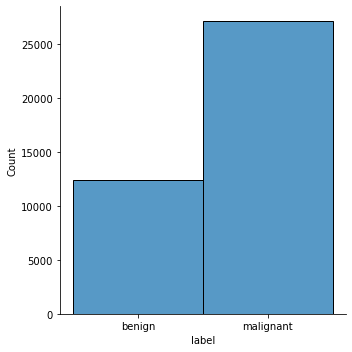

In [3]:
ax = sns.displot(data=data, x='label')
print('Count of Benign    : ', data[data.label == 'benign'].label.count())
print('Count of Malignant : ', data[data.label == 'malignant'].label.count())

ValueError: cannot set using a list-like indexer with a different length than the value

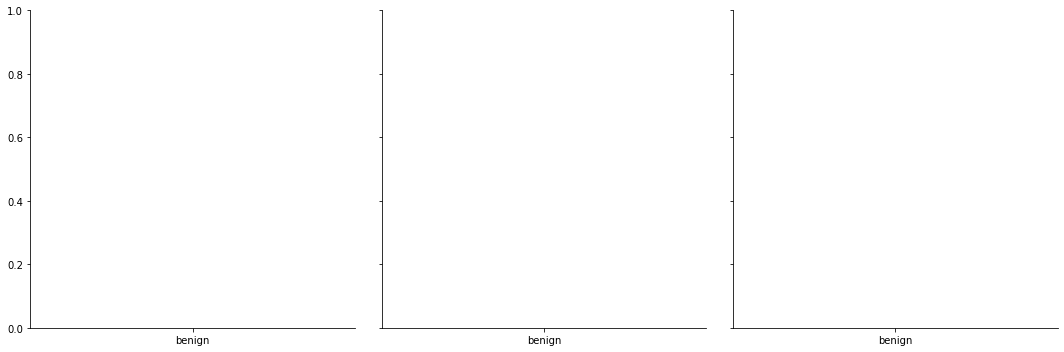

In [4]:
# remove 600 from dataset for testing
test_df = data.groupby('label').sample(n=300)
train_df = data.drop(test_df.index).reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# split training and validation set
valid_df = train_df.sample(frac=0.2)
train_df = train_df.drop(valid_df.index).reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

test_df['set'] = 'test'
train_df['set'] = 'train'
valid_df['set'] = 'valid'
data_new = pd.concat([train_df,valid_df, test_df])

ax = sns.displot(data=data_new, x='label', col='set')

print('Training set')
print(train_df.label.value_counts())

print('\nValidation set')
print(valid_df.label.value_counts())

print('\nTest set')
print(test_df.label.value_counts())


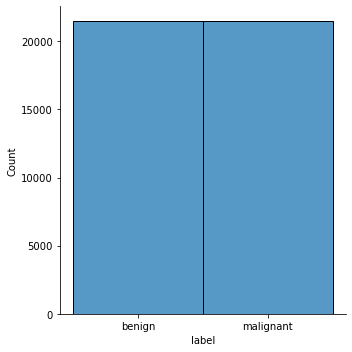

In [5]:
# upsampling training dataset
max_count = np.max(train_df.label.value_counts())
min_count = np.min(train_df.label.value_counts())
train_df = train_df.groupby('label').sample(n=max_count, replace=True)
train_df = train_df.reset_index(drop=True)
train_df.label.value_counts()

ax = sns.displot(data=train_df, x='label')